<a href="https://colab.research.google.com/github/halynhere/CIP-2025/blob/main/FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stocks = ['FE', 'WMT', 'AAPL']
mu = [0.04, 0.09, 0.12, ]
sigma = [0.15, 0.20, 0.35]


<function matplotlib.pyplot.show(close=None, block=None)>

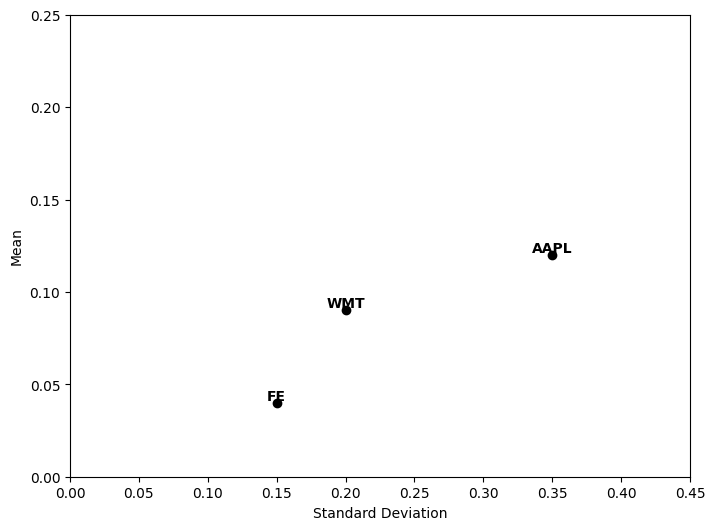

In [2]:
def plot_points(mu, sigma, stocks):
  plt.figure(figsize=(8,6))
  plt.scatter(sigma, mu, c='black') #Generates a scatter plot
  plt.xlim(0,0.45)
  plt.ylim(0,0.25)
  plt.ylabel('Mean')
  plt.xlabel('Standard Deviation')
  for i, stock in enumerate(stocks):
    plt.annotate(stock, (sigma[i], mu[i]), ha='center',
        va='bottom', weight='bold')
plot_points(mu, sigma, stocks)
plt.show

In [3]:
# %%
w = np.array([0.2, 0.3, 0.5]) # Added a fourth weight to match the number of stocks
mu_array = np.array(mu)
sigma_array = np.array(sigma)
# Now both mu_array and w have 4 elements, allowing for the dot product
mu_p = mu_array @ w.T
print('Expected portfolio return: ', mu_p)

Expected portfolio return:  0.095


In [4]:
Corr = [[ 1. , 0.1 , 0.17],
        [ 0.1 , 1. , 0.26],
        [ 0.17, 0.26, 1. ]]
Cov = np.diag(sigma) @ Corr @ np.diag(sigma)

print('Covariance matrix: \n', Cov)

Covariance matrix: 
 [[0.0225   0.003    0.008925]
 [0.003    0.04     0.0182  ]
 [0.008925 0.0182   0.1225  ]]


In [5]:
sigma_p = (w @ Cov @ w.T) ** 0.5
print('Portfolio standard deviation: ', sigma_p)

Portfolio standard deviation:  0.20671236053995415


In [6]:
def random_weights(n_assets):
  k = np.random.randn(n_assets)
  return k / sum(k)
print(random_weights(3))

[ 0.84064371  0.59337983 -0.43402353]


In [8]:
def mu_sigma_portfolio(weights, means, Cov):
  mu_p = np.dot(weights, means)
  sigma_p = (weights @ Cov @ weights) ** 0.5
  return mu_p, sigma_p

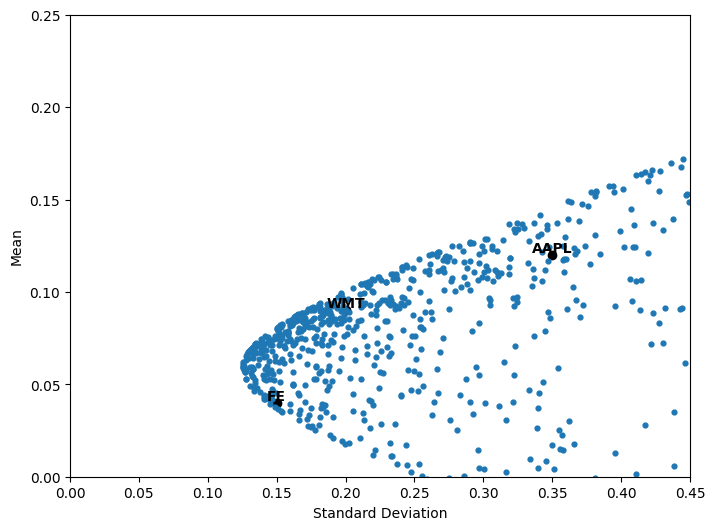

In [12]:
n_assets = len(mu)
def plot_random_portfolios(mu, Cov, n_simulations):
  n_assets = len(mu)
  mu_p_sims = []
  sigma_p_sims = []
  for i in range(n_simulations):
    w = random_weights(n_assets)
    mu_p, sigma_p = mu_sigma_portfolio(w, mu, Cov)
    mu_p_sims.append(mu_p)
    sigma_p_sims.append(sigma_p)
  plt.scatter(sigma_p_sims, mu_p_sims, s=12)
plot_points(mu, sigma, stocks)
n_simulations = 1000
plot_random_portfolios(mu, Cov, n_simulations)
plt.show();



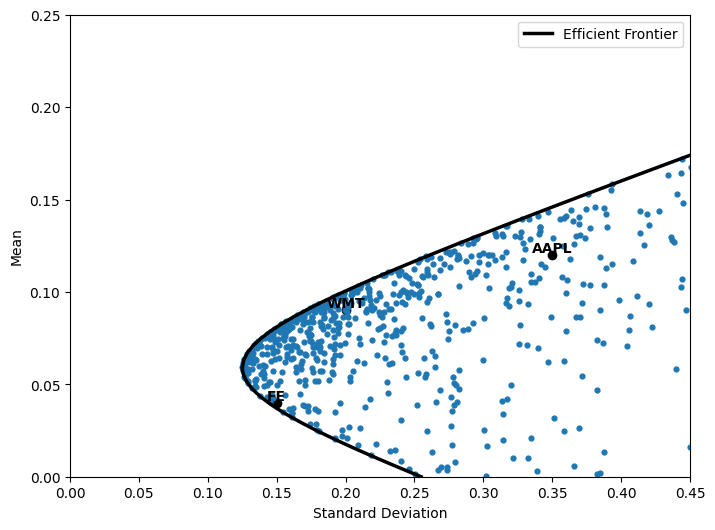

In [13]:
def plot_min_var_frontier(mu, Cov):
  A,B,C = compute_ABC(mu, Cov)
  y = np.linspace(0,B/A,100)
  x = np.sqrt((A*y*y-2*B*y+C)/(A*C-B*B))
  plt.plot(x,y, color='black', lw=2.5, linestyle='-')
  y = np.linspace(B/A,.45,100)
  x = np.sqrt((A*y*y-2*B*y+C)/(A*C-B*B))
  plt.plot(x,y, color='black', lw=2.5, label='Efficient Frontier')
  plt.legend()
def compute_ABC(mu, Cov):
  Cov_inv = np.linalg.inv(Cov)
  ones = np.ones(n_assets)
  A = ones @ Cov_inv @ ones
  B = ones @ Cov_inv @ mu
  C = mu @ Cov_inv @ mu
  return A,B,C

plot_points(mu, sigma, stocks)
plot_random_portfolios(mu, Cov, n_simulations)
plot_min_var_frontier(mu, Cov)
plt.show()